In [5]:
import numpy as np
import os
import sys

In [4]:
mainpath = os.path.join(os.path.dirname('C:\\Users\\User\\PycharmProjects\\Musgrave_scripts\\BenRich\\mnc-pt_surf_anl\\elec_density'), '../../')
sys.path.append(mainpath)
from poscar_scripts.interp import Poscar
import out_anl

ModuleNotFoundError: No module named 'poscar_scripts'

In [9]:
base_dir = 'C:\\Users\\User\\PycharmProjects\\Musgrave_scripts\\BenRich\\'
active_dir = base_dir + 'mnc-pt_surf_anl\\elec_density\\'
import shutil
shutil.copy2(base_dir + 'poscar_scripts\\interp.py', active_dir + 'interp.py')
shutil.copy2(base_dir + 'out_anl.py', active_dir + 'out_anl.py')
import interp
import out_anl

In [31]:
def avg_over_z(d_tot_array, z1, z2):
    zs = int(z2 - z1)
    assert(zs > 0)
    output = np.zeros(np.shape(d_tot_array[:,:,0]))
    for z in np.arange(z1, z2, 1):
        output += d_tot_array[:,:,int(z)]
    return output / zs

def circle_idcs(ci, cj, radius):
    l_bs = [ci - radius, cj - radius]
    h_bs = [ci + radius, cj + radius]
    all_xs = np.arange(int(l_bs[0]), int(h_bs[0]), 1, dtype=int)
    all_ys = np.arange(int(l_bs[1]), int(h_bs[1]), 1, dtype=int)
    use_idcs = []
    for x in all_xs:
        for y in all_ys:
            if ((x - ci)**2 + (y - cj)**2) < radius:
                if [x,y] not in use_idcs:
                    use_idcs.append([x,y])
    return use_idcs

def average_slice(array_slice, use_idcs):
    dividend = len(use_idcs)
    sum_hold = 0
    for idx in use_idcs:
        sum_hold += array_slice[idx[0]][idx[1]]
    return sum_hold / dividend

In [17]:
base_dir = 'C:\\Users\\User\\Desktop\\backup[s\\1-19-2023\\mnc-pt-pyrid\\calcs\\surfs\\1n\\No_bias\\'
os.chdir(base_dir)
test = np.fromfile('d_tot')
newout = out_anl.clean_out('out')
fftbox = out_anl.get_fftbox(newout)
d_tot_array = np.reshape(np.array(test), tuple(fftbox))

In [34]:
contcar = interp.Poscar(base_dir + 'CONTCAR', pc=True)
contcar.posns

[['-0.0002430000000000',
  '0.0007690000000000',
  '0.0006780000000000',
  'F',
  'F',
  'F',
  'C'],
 ['0.9952580000000000',
  '0.1971500000000000',
  '0.0006890000000000',
  'F',
  'F',
  'F',
  'C'],
 ['0.9968470000000004',
  '0.3995609999999998',
  '0.0006690000000000',
  'F',
  'F',
  'F',
  'C'],
 ['0.0015599999999998',
  '0.6021349999999996',
  '0.0006870000000000',
  'F',
  'F',
  'F',
  'C'],
 ['0.0031619999999999',
  '0.8040919999999999',
  '0.0006850000000000',
  'F',
  'F',
  'F',
  'C'],
 ['0.2032090000000000',
  '0.0079290000000000',
  '0.0007540000000000',
  'F',
  'F',
  'F',
  'C'],
 ['0.1982250000000000',
  '0.2068730000000000',
  '0.0009000000000000',
  'F',
  'F',
  'F',
  'C'],
 ['0.1882670000000000',
  '0.3968730000000000',
  '0.0007740000000000',
  'F',
  'F',
  'F',
  'C'],
 ['0.1948710000000000',
  '0.6011600000000000',
  '0.0005750000000000',
  'F',
  'F',
  'F',
  'C'],
 ['0.2008380000000000',
  '0.8040460000000000',
  '0.0005940000000000',
  'F',
  'F',
  'F

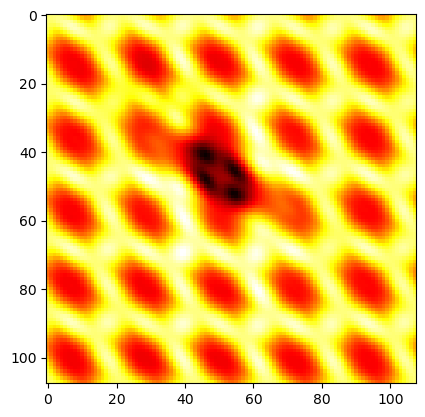

In [28]:
import matplotlib.pyplot as plt
plt.imshow(avg_over_z(d_tot_array, 0, 2), cmap='hot', interpolation='nearest')

In [32]:
circle_idcs(50, 50, 10)

[[47, 50],
 [48, 48],
 [48, 49],
 [48, 50],
 [48, 51],
 [48, 52],
 [49, 48],
 [49, 49],
 [49, 50],
 [49, 51],
 [49, 52],
 [50, 47],
 [50, 48],
 [50, 49],
 [50, 50],
 [50, 51],
 [50, 52],
 [50, 53],
 [51, 48],
 [51, 49],
 [51, 50],
 [51, 51],
 [51, 52],
 [52, 48],
 [52, 49],
 [52, 50],
 [52, 51],
 [52, 52],
 [53, 50]]